In [3]:
import tensorflow as tf
# Load the Tensorflow notebook extension and print its version
print("TF version:", tf.__version__)
!nvidia-smi
!ls /usr/local/cuda -l

TF version: 2.15.0
Tue Jun 11 22:44:01 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.73.01              Driver Version: 552.12         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0 Off |                  N/A |
| N/A   61C    P5              8W /   78W |    4065MiB /   6144MiB |     45%      Default |
|                                         |                        |                  N/A |
+----------------------------

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

$$ y = cos(2x_1)+cos(3x_2) $$

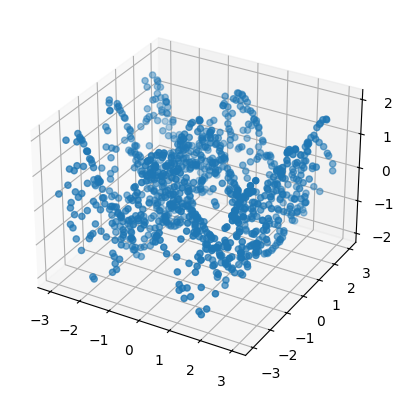

In [7]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [8]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

2024-06-11 22:44:42.781486: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 22:44:42.843008: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 22:44:42.843049: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 22:44:42.847333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-11 22:44:42.847390: I external/local_xla/xla/stream_executor

In [9]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100


2024-04-24 21:51:45.790402: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-04-24 21:51:46.135242: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f732d54b730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-24 21:51:46.135296: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 6GB Laptop GPU, Compute Capability 8.6
2024-04-24 21:51:46.145945: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-24 21:51:46.170819: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1714006306.240986  236095 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 1s 6ms/step - loss: 0.9839
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9161
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.8838
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9138
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8054
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7530
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6980
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6480
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6076
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5763
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5646
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5068
Epoch 13/100
32/32 [=============================

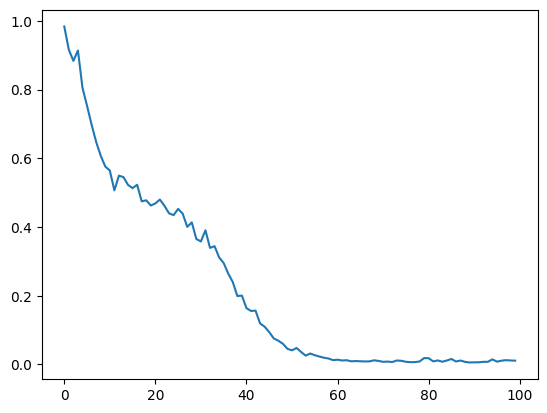

In [11]:
plt.plot(r.history['loss'], label='loss');

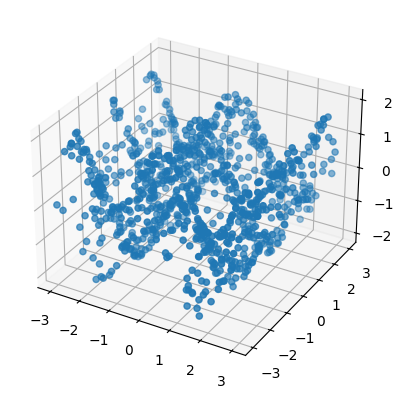

In [15]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

In [16]:
# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 2ms/step


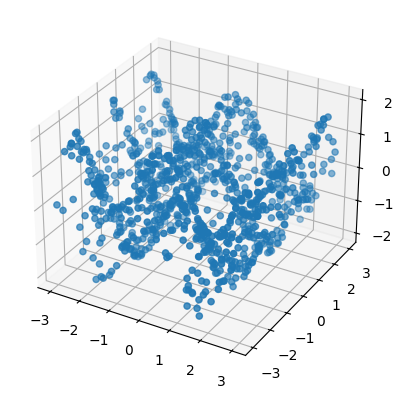

In [17]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [18]:
# surface plot
line =  np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step
